# **Capstone project: Providing data-driven suggestions for HR**

# **PACE stages**


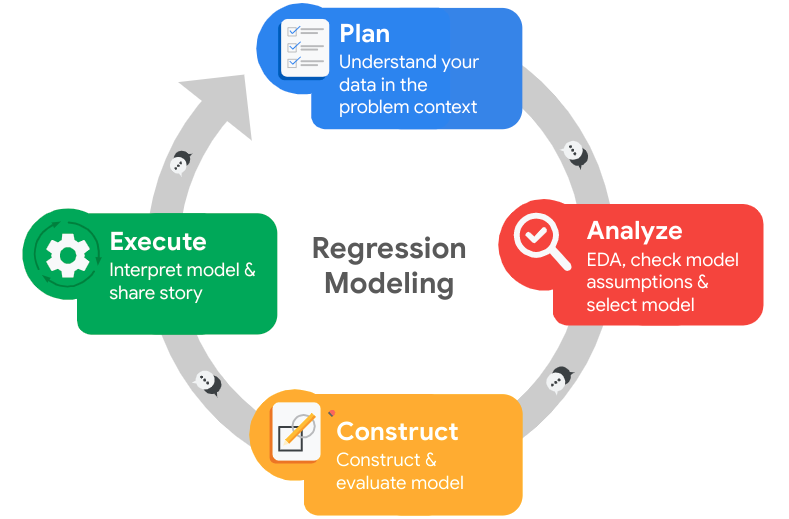

### Business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [1]:
# Import packages

# Pandas and Numpy
import numpy as np
import pandas as pd

# Visualisation packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Modeling packages - unsure of which model will be used yet so we will import a few. More may be imported later
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Scoring metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Check stats on categorical data
df0[['Department','salary']].describe()

,Department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
columns = [i for i in df0.columns]

columns

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

In [7]:
# Rename columns as needed
column_map = {column: column.lower() for column in df0.columns}
df0.rename(mapper = column_map, axis = 1, inplace = True)

# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values and duplicates

Check for any missing values in the data.

In [8]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
df0.duplicated().sum()


3008

In [10]:
# Inspect duplicate rows
df0[df0.duplicated()]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep = 'first')


# Check length of new df
len(df)


11991

### Check outliers

Check for outliers in the data.

In [12]:
# Find the numeric columns

numeric_cols = []
for column, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric_cols.append(column)
        
print(numeric_cols)      

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident', 'left', 'promotion_last_5years']


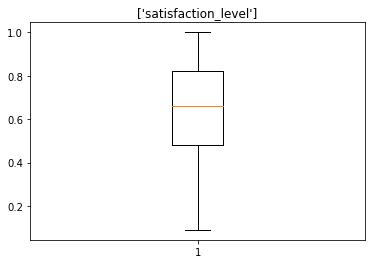

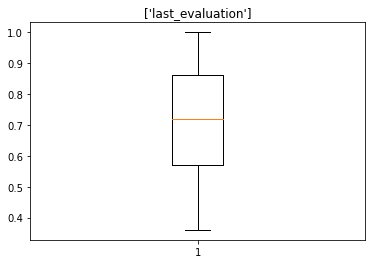

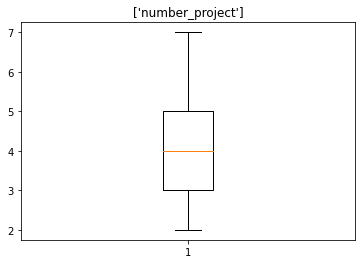

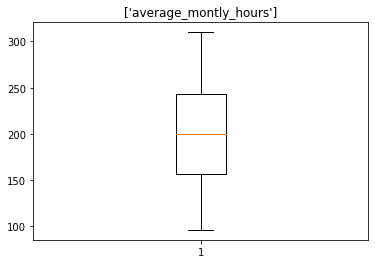

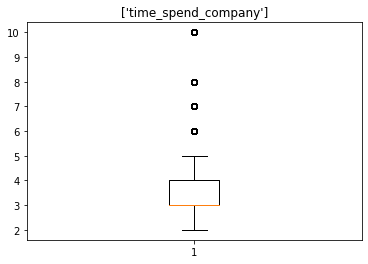

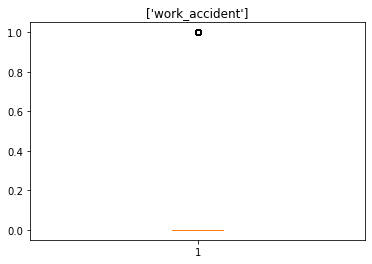

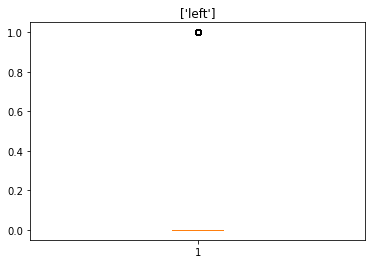

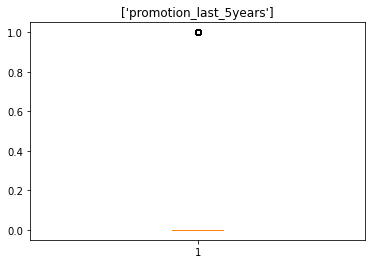

In [13]:
# Create a boxplot to visualize distribution of each col
for column in numeric_cols:
    plt.figure() # create a new fig for each col
    plt.boxplot(df[column]) # box plot for each column
    plt.title([column])
    
plt.show()

### Data visualizations

Now, examine variables that we're interested in, and create plots to visualize relationships between variables in the data.

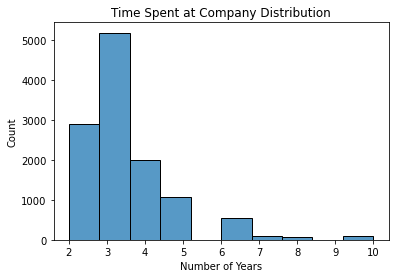

In [14]:
# Check distribution of time_spend_company column since that is the only numeric col that appears to have outliers

sns.histplot(df['time_spend_company'], bins = 10)
plt.xlabel('Number of Years')
plt.title('Time Spent at Company Distribution');

In [15]:
# Determine the number of rows containing outliers in the 'Time_spend_company' column

from scipy import stats

df.loc[stats.zscore(df['time_spend_company']) > 3]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
11007,0.49,0.67,2,190,8,0,0,0,marketing,medium
11008,0.92,0.99,3,176,8,0,0,0,sales,medium
11009,0.81,0.55,4,217,8,0,0,0,accounting,medium
11010,0.62,0.91,3,269,8,0,0,0,support,medium
11011,0.21,0.70,3,238,8,0,0,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


##### We will deal with these outliers in a new dataframe specifically for our Logistic Regression Model since it is sensitive to outliers

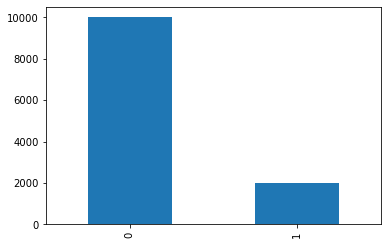

In [16]:
# Get numbers of people who left vs. stayed
df.left.value_counts().plot(kind = 'bar')


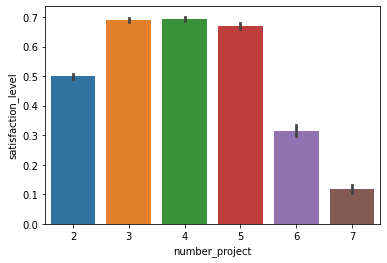

In [17]:
# Create a plot as needed
sns.barplot(x = df['number_project'], y = df['satisfaction_level']);


Text(0.5, 1.0, 'Satisfaction by Number of Projects')

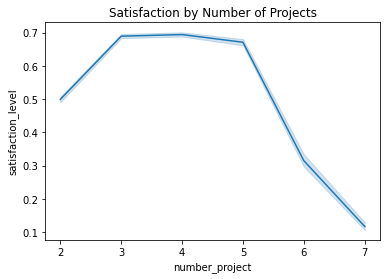

In [18]:
# Let's check this with a line chart to see if the linearity assumption is met, if so we can use a linear regression
# model to see if number of projects is a good predictor of satisfaction

sns.lineplot(x = df['number_project'], y = df['satisfaction_level'])
plt.title('Satisfaction by Number of Projects')

From the above we can see that 3-5 projects is the 'sweet spot' for projects. Satisfaction dramatically drops as more than 5 projects are assigned to an individual. Less than 3 projects also seems to contribute to lowered satisfaction.

While the above is necessarily linear, we will still look into this relationship further with a simple linear regression model

In [19]:
# Import ordinary least squares method

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Subset the data for OLS
ols_data = df[['satisfaction_level', 'number_project']]

# Create ols formula stating what variables we want to see the relationship for
ols_formula = 'satisfaction_level ~ number_project'

# Instantiate and fit an ols model
OLS = ols(formula = ols_formula, data = df)
model = OLS.fit()

# Save model results
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     satisfaction_level   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     216.7
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.26e-48
Time:                        21:06:17   Log-Likelihood:                 152.62
No. Observations:               11991   AIC:                            -301.2
Df Residuals:                   11989   BIC:                            -286.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7347      0.007     98.485      0.000       0.720       0.749
number_project    -0.0276      0.002    -14.721      0.000      -0.031      -0.024
==============================================================================
Omnibus:                     1449.481   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              658.855
Skew:                          -0.398   Prob(JB):                    8.54e-144
Kurtosis:                       2.173   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the above we can see that number projects is not a good predictor of satisfaction level

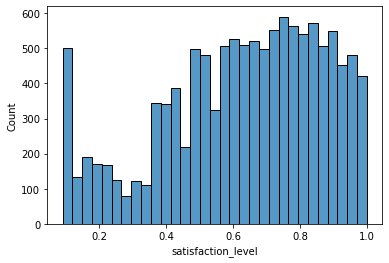

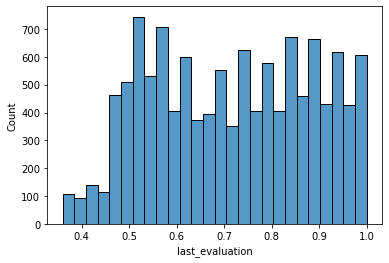

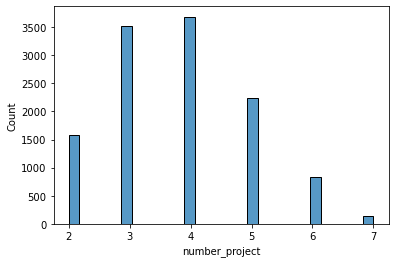

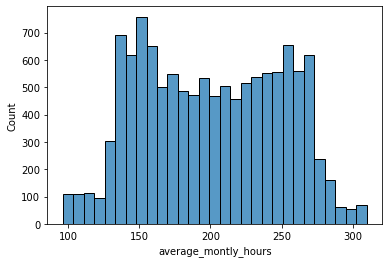

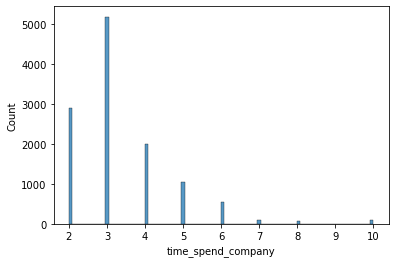

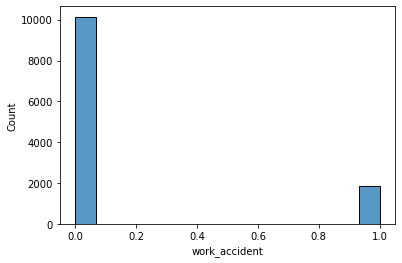

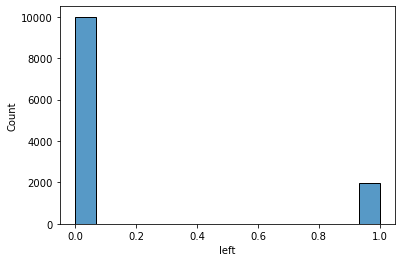

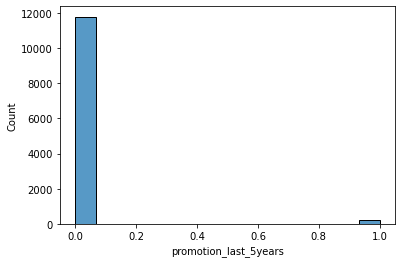

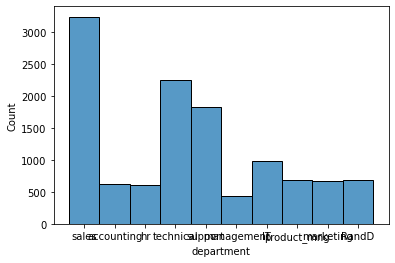

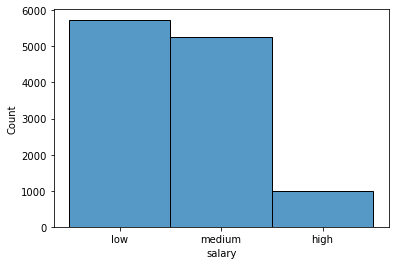

In [20]:
# Check distributions of data

for column in df.columns:
    plt.figure()
    sns.histplot(data=df[column])

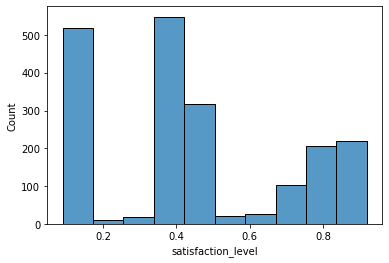

In [21]:
# Check how satisfaction level correlates with if the employee left

left = df.loc[df['left'] == 1]

sns.histplot(left['satisfaction_level'], bins = 10)

From the above we can see most people who left had low satisfaction levels.. We also see some clustering towards the end. This would be something to look into further. Maybe the people who were satisfied but left took an offer for a better job while those that had low levels of satisfaction and left were let go. Seeing the reson for them leaving may be helpful for a better analysis

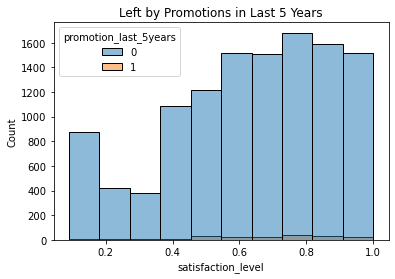

In [22]:
# Check correlation of number of promotions and satisfaction level
df['promotion_last_5years'].value_counts()

sns.histplot(data = df, x = 'satisfaction_level', hue = 'promotion_last_5years', bins = 10)\
.set(title = 'Left by Promotions in Last 5 Years');

From this we can see this company is not promoting people very often. 5 years is quite a long time to go without a promotion, this could be a reason as to why people are leaving. 

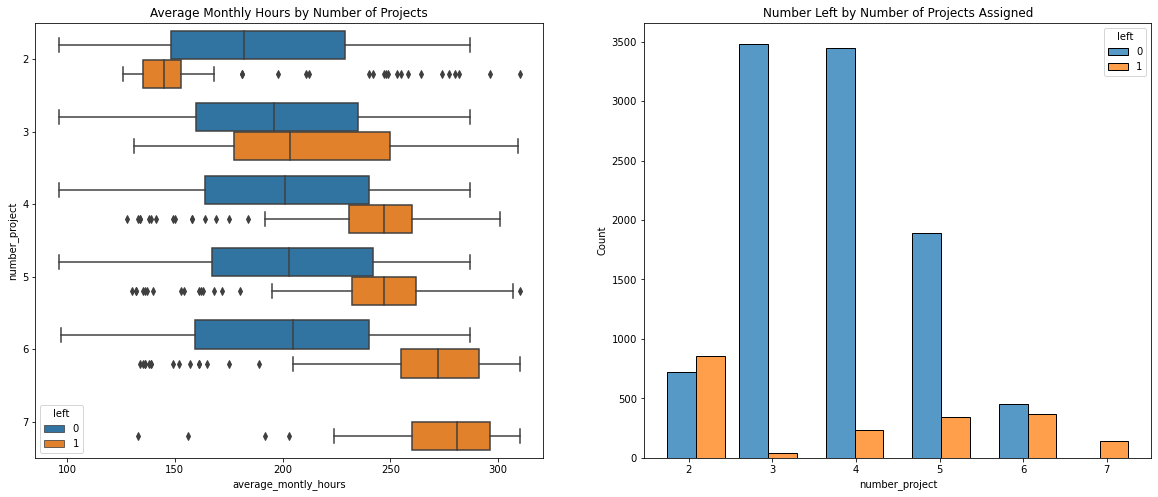

In [23]:
# Boxplot for average monthly house

# Create two empty plots for us to use
fig, ax = plt.subplots(1, 2, figsize=(20,8))

sns.boxplot(x = df['average_montly_hours'], y = df['number_project'], hue = df['left'], orient = 'h', ax = ax[0])
ax[0].invert_yaxis
ax[0].set_title('Average Monthly Hours by Number of Projects')


# Hist plot showing how many employees left by how many projects they were assigned
sns.histplot(x = df['number_project'], hue = df['left'], ax = ax[1], multiple = 'dodge', shrink = 4)
ax[1].set_title('Number Left by Number of Projects Assigned')

plt.show()


From this we can see anyone who has assigned 7 projects has left the company. 

We can also see those who left were people who were either working significantly less (2 projects) or significantly more (6 & 7 projects) than those that did not leave. 

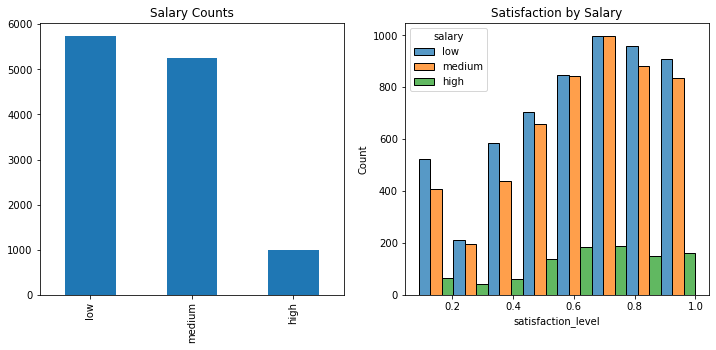

In [24]:
# Let's take a look at how salary's correlation with satisfaction level

fig, ax = plt.subplots(1, 2, figsize = (12, 5))

# First let's take a look at counts of salaries - since salary is a categorical variable we will use a bar chart
df['salary'].value_counts().plot(kind = 'bar', ax = ax[0])
ax[0].set_title('Salary Counts')

# Now let's take a look salary and satisfaction
sns.histplot(data = df, x = df['satisfaction_level'], hue = df['salary'], multiple = 'dodge', bins = 8)
ax[1].set_title('Satisfaction by Salary')

plt.show()

From this we can see that there are quite a bit of employees with 'low' salaries. Even more so than those with medium salaries. This could be something that could be causing such high turnover. We can also see there is a very small amount of employees with high salaries. We can also see that proportionally, employees with high salaries are more satisfied

This is something we can look into further with a regression model, T-test or ANOVA.

In [25]:
df.department.value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

In [26]:
# Encode the categorical variables so we can use linear regression model

# Copy df
df_encoded = df.copy()

# Assign each value of salary to a number. Since they have ordinal value we will encode themn with 1, 2, 3  
df_encoded.loc[df_encoded['salary'] == 'low', 'salary'] = 1
df_encoded.loc[df_encoded['salary'] == 'medium', 'salary'] = 2
df_encoded.loc[df_encoded['salary'] == 'high', 'salary'] = 3

# Validate
df_encoded.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [27]:
# Get column names to copy and paste into the independent variables
df_encoded.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [28]:
# Use the get_dummies function to encode the departments
#This step does not need to be done now but while we are encoding we might as well

df_encoded = pd.get_dummies(df_encoded, columns = ['department'])

# Validate
df_encoded

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,3,0,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,3,0,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,3,0,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,3,0,0,0,0,0,1,0,0,0,0


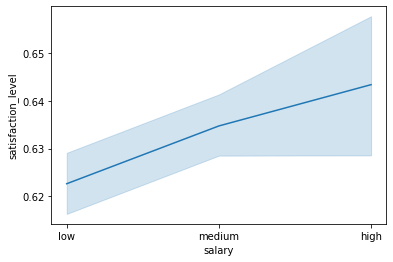

In [29]:
# Check if there is a linear relationship between our salary and satisfaction features using a line chart

sns.lineplot(x = df['salary'], y = df['satisfaction_level']);

Based on the above line chart, we can see the relationship between salary and satisfaction is linear.

We will proceed with the ordinary least squares method to check if salary is a good predictor of satisfaction level. 

* Note: We are using df instead of df_encoded because we will also be conducting an anova test which compares the differences in means of our dependent variable based on three or more groups of one categorical variable. In our case this would be the low, medium and high salaries.

In [30]:
# Import models needed for linear regression

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [31]:
# Split our data into X(independant) and y(dependant) variables
X = df['salary']
y = df['satisfaction_level']

# Create the formula for the OLS model
ols_formula = 'satisfaction_level ~ salary'

# Create the model
OLS = ols(formula = ols_formula, data = df_encoded)
model = OLS.fit()
#Get the model results

summary = model.summary()
summary



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     satisfaction_level   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.182
Date:                Thu, 19 Oct 2023   Prob (F-statistic):            0.00563
Time:                        21:06:21   Log-Likelihood:                 50.400
No. Observations:               11991   AIC:                            -94.80
Df Residuals:                   11988   BIC:                            -72.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6227      0.003    195.754      0.000       0.616       0.629
salary[T.2]     0.0121      0.005      2.624      0.009       0.003       0.021
salary[T.3]     0.0207      0.008      2.495      0.013       0.004       0.037
==============================================================================
Omnibus:                      767.562   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.383
Skew:                          -0.535   Prob(JB):                    9.11e-155
Kurtosis:                       2.475   Cond. No.                         4.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above R-Squared value we can see that salary is not a good predictor of satisfaction as the R-squared value is only 0.001 - signifying that salary does not explain the change in satisfaction. 

In [32]:
# Import scipy
import scipy.stats as stats

In [33]:
# Group the data
grouped_data = [df[df['salary'] == level]['satisfaction_level'] for level in df['salary'].unique()]
grouped_data

# Run an anova test on salary to test the mean of the satisfaction level between the different levels of salary
anova_result = stats.f_oneway(*grouped_data)
anova_result

F_onewayResult(statistic=5.182206107417106, pvalue=0.005628190907669673)

#### Anova Summary

In summary, the results of the ANOVA test indicate that salary is a significant, predictor of satisfaction levels, which is inferred by the very small P-value. We can also see there are meaningful differences in satisfaction levels among the various salary groups in your dataset, which can be inferred from the relatively large f-statistic.

#### EDA Cont.

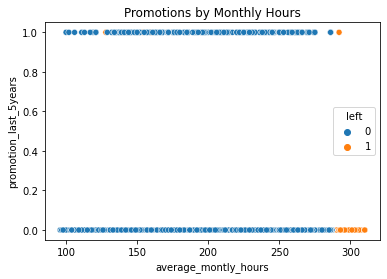

In [34]:
# Let's now take a look at if working long hours is rewarded with a promotion

sns.scatterplot(x = df['average_montly_hours'], y = df['promotion_last_5years'], hue = df['left'])\
.set(title = 'Promotions by Monthly Hours');

From this visual we can see that employees who are working long hours without a promotion usually end up leaving the company. If someone feels they are not being rewarded or their work is not being noticed they will likely be more inclined to leave. 

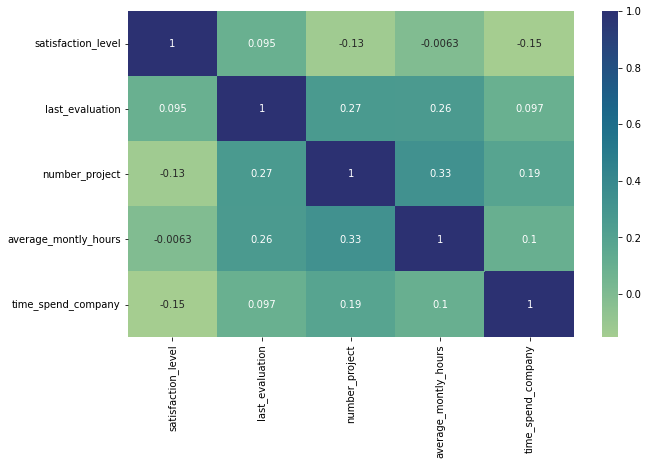

In [35]:
# Create a correlation matrix using our encoded dataset to see how correlated columns are to each other

fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(data = df_encoded[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr(), annot = True, cmap = 'crest')
plt.show()

#### We can see a moderate correlation between the number_project column and the average_monthly_hours column - we may want to consider doing some feature engineering. For now we will skip this step since the correlation is not too concerning and the classification models we will be testing handle collinearity well. Depending on how our models perform we may revisit this

## Step 3. Model Building, Step 4. Results and Evaluation

#### For this project we will test 4 different classification models

1. Logistic Regression ✅
2. Decision Tree Classifier ✅
3. Random Forest Classifier ✅
4. XGBoost Classifier ✅

### Identify the type of prediction task.

As this is a binary classification task we can have two types of errors:

- Type I Error (False Positive) - This error occurs when we predict someone to leave, but they actually don't

- Type II Error (False Negative) - This error occurs when we predict someone will stay, but they actually leave.

Depeding on which of these errors we want to avoid more, we might lean towards a certain evaluation metric. If we are trying to avoid False Negatives we may opt to lower the classification threshold. 


## Evaluation metrics for our Classification Models

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example. This metric is particularly useful for imbalanced target variables.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.


#### Handle outliters for Logistic Regression
AS stated earlier, Logistic Regression is senstitive to outliers, so we will deal with the outliers in the time_spend_company column that we saw were present from our box plot

In [36]:
# Identify the rows in the df_encoded df that contain outliers in time_spend_company column

# We will determine outliers as any row that has a z score > 3 or < -3
time_spend_company_ol = df_encoded.loc[(abs(stats.zscore(df_encoded['time_spend_company'])) > 3)]

# Drop any column found in the above result
df_encoded_no_ol = df_encoded.drop(time_spend_company_ol.index)

In [37]:
# Double check that all our columns are numeric dtypes
df_encoded.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
work_accident               int64
left                        int64
promotion_last_5years       int64
salary                     object
department_IT               uint8
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
dtype: object

In [38]:
# Salary is still an object dtype - we need to encode it

df_encoded['salary'] = pd.to_numeric(df_encoded['salary'])

In [39]:
# Validate
df_encoded.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
work_accident               int64
left                        int64
promotion_last_5years       int64
salary                      int64
department_IT               uint8
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
dtype: object

In [40]:
# For ONLY our Logistic Regression model we will use the dataset from which we deleted outliers

# Check dtypes of that dataset

df_encoded_no_ol.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
work_accident               int64
left                        int64
promotion_last_5years       int64
salary                     object
department_IT               uint8
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
dtype: object

#### For all of our models we will need to split the data in to X and Y and then into train_test_splits. 

In [41]:
# Split data into X and y 
# For our logistic regression model we will be using the dataset in which we dropped outliers
X = df_encoded_no_ol.drop(['left'], axis = 1)
y = df_encoded_no_ol['left']

In [42]:
print(X.shape)
print(y.shape)

(11803, 18)
(11803,)


In [43]:
# Checking balance of the target variable. If the values are heavily unbalanced we may want to consider upsampling or downsampling

df_encoded_no_ol['left'].value_counts()

0    9812
1    1991
Name: left, dtype: int64

In [44]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 24)

In [45]:
# Validate shapes of train and test splits

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9442, 18)
(2361, 18)
(9442,)
(2361,)


In [46]:
df_encoded_no_ol.department_IT.value_counts()

0    10840
1      963
Name: department_IT, dtype: int64

### Model #1

First we will create a logistic regression model

In [47]:
# Instantiate Logistic Regressor

clf = LogisticRegression(random_state = 24, solver = 'liblinear')

# Fit the model to the training data

model = clf.fit(X_train, y_train)

In [48]:
# Make predictions on validation dataset -- Is that correct procedure?
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
# Create Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1963
           1       0.41      0.18      0.25       398

    accuracy                           0.82      2361
   macro avg       0.63      0.56      0.57      2361
weighted avg       0.78      0.82      0.79      2361



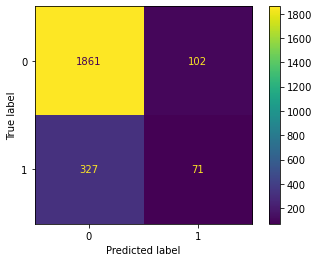

In [50]:
# Plot a correlation matrix to check results

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Create confusion matrix of the preds and y train
conf_matrix = confusion_matrix(y_test, y_preds)
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels = clf.classes_)

# plot the confusion matrix
conf_matrix_display.plot(values_format='');

As we can see from the scoring metrics and confusion metrics, this model preformed pretty poorly when it comes to predicting employees who would leave. Assuming predicting those who are going to leave is of high importance, we may want to examine balancing the classes a bit more to allow the model to find more patterns.

Since our model had a decent accuracy score, we will check the prediction value counts. The model could have predicted all 0's and still scored fairly well since the target variable is imbalanced

In [51]:
# Turn clf_preds into a dataframe so we can use value_counts()

preds_df = pd.DataFrame(data = y_preds, columns = ['Predictions'])

# Get value counts
preds_df.value_counts()

Predictions
0              2188
1               173
dtype: int64

As we can see our model predicted only about 7% of the employees to leave. This could be because the model did not have enough 'left' values to learn the patterns, again making a case for us to upsample if we were to move forward with this model

### Model #2

Next, we will move onto creating a Decision Tree Classifier

In [52]:
# Split data again into X (predictor variables) and y (target variable) again

X = df_encoded.drop(['left'], axis = 1)

y = df_encoded.left

In [53]:
# Split into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24, stratify = y)

In [54]:
# For this model, we will use GridSearchCV for hyperparameter tuning

# instantiate Decision Tree Classifier

tree = DecisionTreeClassifier(random_state = 24)

# Create a hyperparameter dictionary to pass to GridSearch

param_grid = {'max_depth' : [4,6,8],
              'min_samples_split' : [2,4,6],
              'min_samples_leaf' : [2,4,6],
              'max_features': [0.6,0.8,1.0]}

# Dictionary or scoring metrics we want to see 

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearchCV with parameters
tree_cv = GridSearchCV(estimator = tree, 
                       param_grid = param_grid, 
                       scoring = scoring, 
                       n_jobs = -1, 
                       cv = 4, 
                       refit = 'roc_auc')

In [55]:
%%time

# fit the model to X and y training data
tree1 = tree_cv.fit(X_train, y_train)

CPU times: user 316 ms, sys: 80.9 ms, total: 397 ms
Wall time: 3.76 s


In [56]:
# Check the best parameters of the model

tree1.best_params_

{'max_depth': 4,
 'max_features': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [57]:
# Check what the best score was
tree1.best_score_

0.9700984310858147

In [58]:
# Predict data based on our training set
y_preds = tree1.predict(X_test)

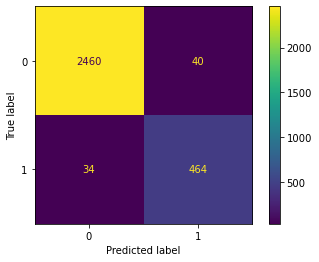

In [59]:
# Evaluate the model with a confusion matrix
tree_confusion_matrix = confusion_matrix(y_test, y_preds)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(tree_confusion_matrix, display_labels = tree1.classes_)
disp.plot(values_format='')


In [60]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2500
           1       0.92      0.93      0.93       498

    accuracy                           0.98      2998
   macro avg       0.95      0.96      0.96      2998
weighted avg       0.98      0.98      0.98      2998



#### Plot feature importances for decision tree

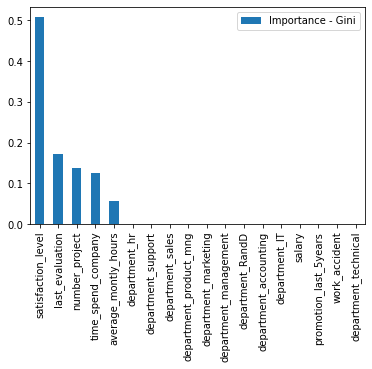

In [61]:
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_,
                                 columns = ['Importance - Gini'],
                                 index = X.columns)

# Sort values in descending order
tree1_importances = tree1_importances.sort_values(by = ['Importance - Gini'], ascending = False)
tree1_importances.plot(kind = 'bar');

#### Decision Tree Result

This is a very good area under the curve score which shows that this model is a strong predictor of employees that will leave.

The auc metric provides a measure of the model's ability to distinguish between the two classes (positive and negative) by assessing the trade off between true positive rate and false positive rate as the discrimination threshold varies. The auc_roc metric is also very useful in imbalanced datasets as it assigns more weight to the minority class.

### Model #3

Next, we will train a Random Forest Classifier

In [62]:
# Split data into X and y again

X = df_encoded.drop(['left'], axis = 1)

y = df_encoded['left']

In [63]:
# Split data into training and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0, stratify = y)

# Validate shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8993, 18)
(2998, 18)
(8993,)
(2998,)


In [64]:
# For RandomForest we will use Randomized Search CV which will pick a random set from our hyperparameter dictionary

from sklearn.model_selection import RandomizedSearchCV

In [65]:
# Instantiate RandomForestClassifier

rfc = RandomForestClassifier(random_state = 0)

# Create dictionary for RandomForest hyperparameters

rf_grid = {'n_estimators' : [100,500],
           'max_features' : ['sqrt', .5, .8],
           'max_depth': [5,7,9],
           'min_samples_split' : [2,5,10],
           'min_samples_leaf' : [2,4,6],
           'bootstrap': [True, False]}

# Create scoring dictionary criteria
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']


# Pass the model, hyperparams and scoring metrics to the RandomizedSearchCV model

rs_rfc = RandomizedSearchCV(estimator = rfc,
                           param_distributions = rf_grid,
                           scoring = scoring,
                           n_jobs = -1,
                           cv = 4,
                           refit = 'roc_auc')#

In [66]:
# Fit model to training data

rf1 = rs_rfc.fit(X_train, y_train)

In [67]:
rf1.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 9,
 'bootstrap': False}

In [68]:
rf1.best_score_

0.9804358064161566

In [69]:
y_preds = rf1.predict(X_test)

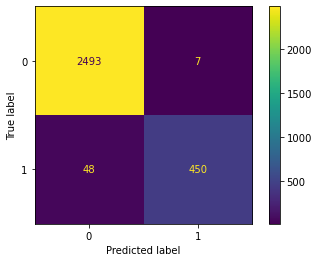

In [70]:
rf_conf_mtx = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(rf_conf_mtx, display_labels = rf1.classes_)
disp.plot(values_format='')

In [71]:
# Check value counts of predictions

df_preds = pd.DataFrame(data = y_preds, columns = ['Predictions'])
df_preds.value_counts()

Predictions
0              2541
1               457
dtype: int64

Our random forest model predicted far more employees would leave than our simple logistic regression model.

In [72]:
# Create a classification report

print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2500
           1       0.98      0.90      0.94       498

    accuracy                           0.98      2998
   macro avg       0.98      0.95      0.97      2998
weighted avg       0.98      0.98      0.98      2998



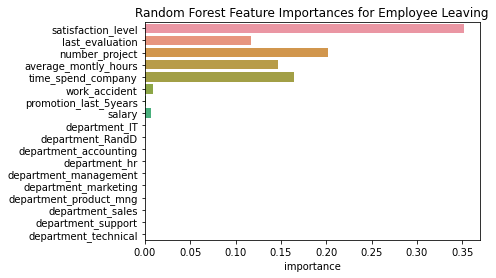

In [73]:
# Create Dataframe of feature importances from our Random Forest Model

forest_importances = pd.DataFrame(rf1.best_estimator_.feature_importances_,
                                  columns = ['importance'],
                                  index = X.columns)

# Plot the feature importances

sns.barplot(data = forest_importances, x = forest_importances['importance'], y = forest_importances.index)
plt.title('Random Forest Feature Importances for Employee Leaving')
plt.show()

#### Random Forest Result

Our RandomForestClassifier scored 1% better than our decision tree - had we used GridSearchCV instead of RandomizedGridSearch and iterated over every different combination of hyperparameters we may have seen an even better score. 

Since our dataset has fairly few features and is not large it did not take very long to train we may want to continue with this model. However if our dataset was larger and processing speeds were important to us, the extra 1% of performance might not be worth the trade off in run time.  

## Model #4 

Lastly, we will create an XGBoost Classifier

In [74]:
# Split data to X and y

# X - independant variables
X = df_encoded.drop(['left'], axis = 1)

# y - dependant variables
y = df_encoded.left

In [75]:
# Split data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8993, 18)
(2998, 18)
(8993,)
(2998,)


In [76]:
# Import XGBoost Model

from xgboost import XGBClassifier, plot_importance

In [77]:
# Instantiate XGBoost

xgb = XGBClassifier(objective = "binary:logistic", random_state = 99)

# Create hyperparam dictionary for RandomizedSeachCV

param_dict = {'n_estimators' : [100,500],
              'max_depth' : [4,6,8,10],
              'min_child_weight' : [3,5,10],
              'learning_rate' : [.1, .2, .3],
              'subsample' : [.5, .75, .9],
              'colsample_bytree' : [.5, .6, .7]}

# Scoring metrics to evaluate on
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']


# Create RandomizedSearchCV model with our xgb variable

rs_xgb = RandomizedSearchCV(xgb, 
                            param_distributions = param_dict,
                            scoring = scoring,
                            cv = 4, 
                            refit = 'roc_auc',
                            n_jobs = -1)

In [78]:
%%time
xgb1 = rs_xgb.fit(X_train, y_train)

CPU times: user 1.52 s, sys: 32.3 ms, total: 1.55 s
Wall time: 41.8 s


In [79]:
# Check best parameters
xgb1.best_params_

{'subsample': 0.5,
 'n_estimators': 100,
 'min_child_weight': 5,
 'max_depth': 10,
 'learning_rate': 0.1,
 'colsample_bytree': 0.6}

In [80]:
# Check best score
xgb1.best_score_

0.9823654437451315

In [81]:
# Get predictions

y_preds = xgb1.predict(X_test)

In [82]:
xgb1.classes_

array([0, 1])

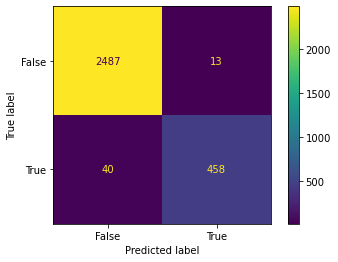

In [83]:
# Plot confusion matrix
xgb_conf_mtx = confusion_matrix(y_test, y_preds, labels = xgb1.classes_)
disp = ConfusionMatrixDisplay(xgb_conf_mtx, display_labels = ['False', 'True'])
disp.plot(values_format = '')


In [84]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2500
           1       0.97      0.92      0.95       498

    accuracy                           0.98      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



We can see from this classification report our model is very effective at predicting both employees who will leave and employees who will not leave

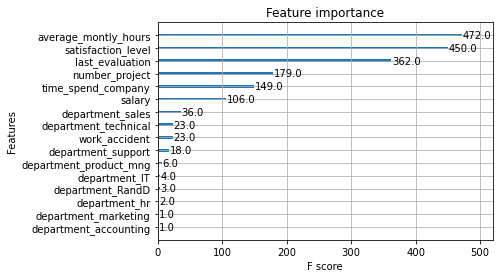

In [85]:
# Check feature importances using plot_importance

xgb_plot_importance = plot_importance(xgb1.best_estimator_)

We can see from our plot of feature importances that this XGBoost model has found satisfaction level, average monthly hours, and last evaluation to be the three most important features respectively by quite a large margain. 

#### XGBoost Result

We can see our XGBoost model performs just about the same as our Random Forest model. Again, had we used a grid search method instead of a randomized search we may see better results. This may be something to take into consideration as boosting models can be difficult to explain. Because of this we may consider using our RandomForest model instead of Boosting model since we don't see much of an increase in performance while sacrificing computing time and increased difficulty to explain. 

Luckily, we have a fairly small and simple dataset. However, if the size and complexity of features in the dataset were to increase - the factors mentioned above may play a bigger role and become something to consider. 

#### Since satisfaction level and avg monthly hours are the two most important variables, we will analyze these a bit further

In [86]:
# First, one might assume that more projects equates to more hours worked, we will look into this first


# We will first bucket the amount of projects into low, medium, and high groups

# Set new column = low
df_encoded['projects_bucketed'] = 'low'

# Where projects are 4 - 5 set new col = medium & 6 - 7 = high
df_encoded.loc[(df_encoded['number_project'] >= 4) & (df_encoded['number_project'] <= 5), ['projects_bucketed']] = 'medium' 
df_encoded.loc[(df_encoded['number_project'] >=6) & (df_encoded['number_project'] <= 6), ['projects_bucketed']] = 'high'


In [87]:
# Validate
df_encoded['projects_bucketed'].value_counts()

medium    5918
low       5247
high       826
Name: projects_bucketed, dtype: int64

In [88]:
# Check the average monthly hours by the new project groups we created

df_encoded.groupby(by = ['projects_bucketed'])['average_montly_hours'].mean()

projects_bucketed
high      230.392252
low       189.694492
medium    205.854512
Name: average_montly_hours, dtype: float64

From the above we can see that those who have a high project count are, on average, working 25 more hours than those with a medium project count, and over 40 more hours than those with a low project counts. This equates to one extra week of worth each month!!

In [89]:
# Let's also look at mean satisfaction score by the project groups
df_encoded.groupby(by = ['projects_bucketed'])['satisfaction_level'].mean()

projects_bucketed
high      0.314673
low       0.616200
medium    0.685554
Name: satisfaction_level, dtype: float64

From this analysis we can see that those with high project counts have only half the satisfaction score that those with a medium project count have

## Step 4. Results and Evaluation

#### Model Selection
Based on our evaluation metrics, our Decision Tree, Random Forest Classifier, and XGBoost Models all performed well. Since XG Boost models are difficult to explain and can take a lot of computational resources it may be in the comapny's best interest to use the Random Forest Classifier or the Decision Tree Classifier. Both of these models performed well when evaluating them using the area under the curve metric. This metric is especially useful on imbalanced datasets, which we are dealing with in this case. 


#### Potential Next Steps

A few more steps could be taken to further our analysis and potentially create more effective models, these include:
1. Feature Engineering - This involves creating new features based on the features we currently have in the dataset. For instance we could transform the monthly hours column into a column that is binary based on if the employee is working more than the average monthly hours in a standard work month (~220 hours).
2. Adjust the classification threshold - Depending on how important classifying those likely to leave is, we may want to lower the classification threshold to give us a better chance at classifying all of those who will leave and lower the chance of making a type II error (false negative).
3. Gather more data - This is a relatively small dataset with a fairly imbalanced target variable, ~90% of the target variable is false while ~10% is true. If it is possible to gather more data to train out model on this could help to increase the scores of our model.  

### Recommendations

Based on our feature importances from our models: 

1. We should consider capping the amount of projects employees are working on. This feature ranked highly influential on employees leaving the company
2. Average Monthly Hours is also playing a large role in employee turnover. We may want to consider implementing something such as summer fridays to counteract potential burn out 😎 or monitoring employee hours to make sure they are not overworked. 
3. Time Spend at Company is also an important contributing factor, find a way to reward those who have been with the company for a long time. Many companies are implementing some type of sabbatical for employees who have been with the comapny for X amount of years, this may be a practice worth adopting. We can also conduct further investigation into promotions of those who have been with the company for a long time to make sure they are being adequately compensated for their tenure. 